<!-- @format -->

# Drone Shooter with dqn

## Step 1: Import the libraries


In [1]:
import time
import gym
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
import math

In [3]:
import sys
sys.path.append('../')

from agent.dqn import Agent
import gym
from drone_gym import DroneShooterEnv


gym.register(
    id='DroneShooterxxx-v1',
    entry_point='drone_gym:DroneShooterEnv',
)

Loading image from: /Users/victorumesiobi/Desktop/vicks/Me/Pythorch/drone-reinforcement-learning/src/open_gym/../game_objects/assets/bug.png
Loading image from: /Users/victorumesiobi/Desktop/vicks/Me/Pythorch/drone-reinforcement-learning/src/open_gym/../game_objects/assets/background/background6.jpg
Loading image from: /Users/victorumesiobi/Desktop/vicks/Me/Pythorch/drone-reinforcement-learning/src/open_gym/../game_objects/assets/Drone.png


<!-- @format -->

## Step 2: Create our environment

Initialize the environment in the code cell below.


In [4]:
env = gym.make('DroneShooterxxx-v1')

/Users/victorumesiobi/anaconda3/lib/python3.11/site-packages/gym/utils/passive_env_checker.py:20: UserWarning: WARN: It seems a Box observation space is an image but the `dtype` is not `np.uint8`, actual type: float32. If the Box observation space is not an image, we recommend flattening the observation to have only a 1D vector.
  logger.warn(
/Users/victorumesiobi/anaconda3/lib/python3.11/site-packages/gym/utils/passive_env_checker.py:25: UserWarning: WARN: It seems a Box observation space is an image but the upper and lower bounds are not in [0, 255]. Generally, CNN policies assume observations are within that range, so you may encounter an issue if the observation values are not.
  logger.warn(


In [ ]:
# if gpu is to be used
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device: ", device)

Device:  cpu


<!-- @format -->

## Step 3: Viewing our Enviroment


The size of frame is:  (4, 84, 84)
No. of Actions:  4
Initial State Shape:  (4, 84, 84)


/Users/victorumesiobi/anaconda3/lib/python3.11/site-packages/gym/utils/passive_env_checker.py:174: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator.
  logger.warn(
/Users/victorumesiobi/anaconda3/lib/python3.11/site-packages/gym/utils/passive_env_checker.py:187: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed `options` to allow the environment initialisation to be passed additional information.
  logger.warn(
/Users/victorumesiobi/anaconda3/lib/python3.11/site-packages/gym/utils/passive_env_checker.py:195: UserWarning: WARN: The result returned by `env.reset()` was not a tuple of the form `(obs, info)`, where `obs` is a observation and `info` is a dictionary containing additional information. Actual type: `<class 'numpy.ndarray'>`
  logger.warn(


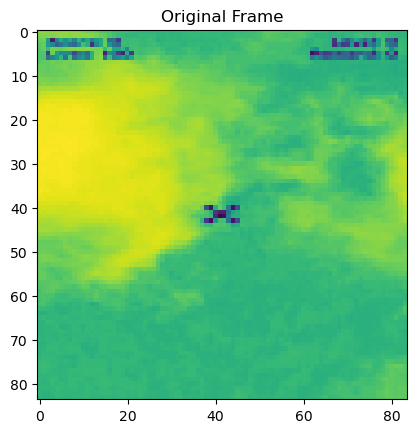

In [5]:
print("The size of frame is: ", env.observation_space.shape)
print("No. of Actions: ", env.action_space.n)
initial_state = env.reset()

print("Initial State Shape: ", initial_state.shape)

plt.figure()
plt.imshow(initial_state[0])
plt.title('Original Frame')
plt.show()


<!-- @format -->

### Execute the code cell below to play Pong with a random policy.


In [6]:
def random_play():
    score = 0
    env.reset()
    while True:
        env.render()
        action = env.action_space.sample()
        state, reward, done, _ = env.step(action)
        score += reward
        if done:
            env.close()
            print("Your Score at end of game is: ", score)
            break
random_play()

/Users/victorumesiobi/anaconda3/lib/python3.11/site-packages/gym/utils/passive_env_checker.py:219: DeprecationWarning: WARN: Core environment is written in old step API which returns one bool instead of two. It is recommended to rewrite the environment with new step API. 
  logger.deprecation(
/Users/victorumesiobi/anaconda3/lib/python3.11/site-packages/gym/utils/passive_env_checker.py:225: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(done, (bool, np.bool8)):
/Users/victorumesiobi/anaconda3/lib/python3.11/site-packages/gym/utils/passive_env_checker.py:141: UserWarning: WARN: The obs returned by the `step()` method was expecting numpy array dtype to be float32, actual type: float64
  logger.warn(
/Users/victorumesiobi/anaconda3/lib/python3.11/site-packages/gym/utils/passive_env_checker.py:165: UserWarning: WARN: The obs returned by the `step()` method is not within the observation space.
  logger.warn(f"{pre} is not wi

Your Score at end of game is:  31770


<!-- @format -->

## Step 4: Creating our Agent


In [7]:
agent = Agent()


No saved model found at ./model/model.pth


<!-- @format -->

## Step 4:Preprocessing Frame


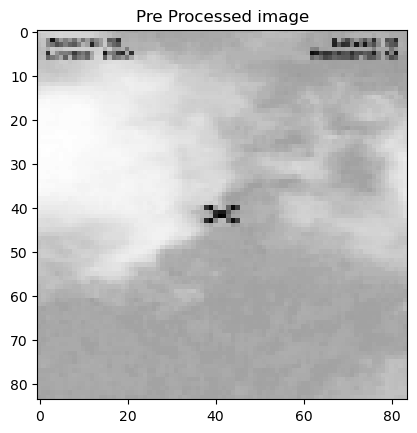

In [8]:
initial_state = env.reset()[0]
plt.figure()
plt.imshow(initial_state, cmap="gray")
plt.title('Pre Processed image')
plt.show()

<!-- @format -->

## Step 7: Watching untrained agent play


In [9]:

# watch an untrained agent
state = env.reset()
for j in range(200):
    env.render()
    action = agent.act(state)
    state_next, reward, done, _ = env.step(action)
    agent.remember(state, action, reward, state_next, done)
    state = state_next
    if done:
        break 
        
env.close()

<!-- @format -->

## Step 8: Loading Agent

Uncomment line to load a pretrained agent


In [10]:
start_epoch = 0
scores = []
scores_window = deque(maxlen=20)

<!-- @format -->

## Step 9: Train the Agent with DQN


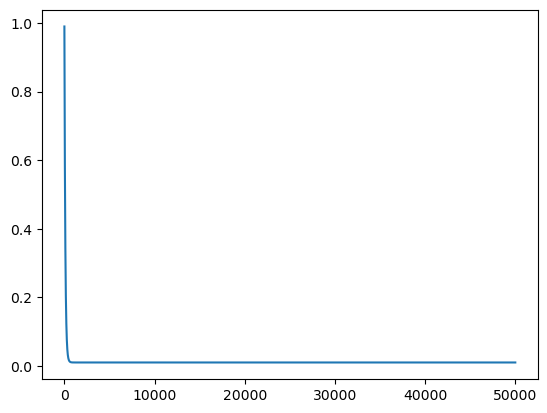

: 

In [11]:
EPS_START = 0.99       # starting value of epsilon
EPS_END = 0.01         # Ending value of epsilon
EPS_DECAY = 100  

epsilon_by_epsiode = lambda frame_idx: EPS_END + (EPS_START - EPS_END) * math.exp(-1. * frame_idx /EPS_DECAY)

plt.plot([epsilon_by_epsiode(i) for i in range(50000)])

In [ ]:
# def train(n_episodes=10000):
#     for i_episode in range(start_epoch + 1, n_episodes+1):
#         print("Training episode:", n_episodes)

#         state =  env.reset()
#         score = 0
#         eps = epsilon_by_epsiode(i_episode)
#         while True:
#             action = agent.act(state)
#             env.render()
#             state_next, reward, terminal, _ = env.step(action)
#             score += reward
#             agent.remember(state, action, reward, state_next, terminal)
#             state = state_next
#             if done:
#                 break
#         scores_window.append(score)       # save most recent score
#         scores.append(score)              # save most recent score
#         print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        
#         if i_episode % 100 == 0:
#             print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
#             fig = plt.figure()
#             ax = fig.add_subplot(111)
#             plt.plot(np.arange(len(scores)), scores)
#             plt.ylabel('Score')
#             plt.xlabel('Episode #')
#             plt.show()
    
#     return scores

In [ ]:
# scores = train(10000)

Training episode: 10000


KeyboardInterrupt: 

: 

<!-- @format -->

## Step 10: Watch a Smart Agent!


In [ ]:
# score = 0
# state = env.reset()
# while True:
#     env.render()
#     action = agent.act(state)
#     state_next, reward, terminal, _ = env.step(action)
#     score += reward
#     agent.remember(state, action, reward, state_next, terminal)
#     state = state_next
#     if done:
#         print("You Final score is:", score)
#         break 
# env.close()